# Pyber Ride Sharing

Analysis: 
* Observed Trend 1: The average fares of rural areas are more spead out than urban and suburban areas.
* Observed Trend 2: The amount of total fares, toal rides, and total drivers are bigger in urban cities than rural and suburban ones.
* Observed Trend 3: The amount of total fares, toal rides, and total drivers are bigger in suburban cities than rural ones.

In [1]:
# Import dependencies
%matplotlib inline
import pylab
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams

# Read csv files
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

In [2]:
# Merge dataframes
df = pd.merge(left=ride_df, right=city_df, on="city", how="outer")
df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


# Bubble Plot of Ride Sharing Data

In [3]:
# Using groupby to get data series
df_group = df.groupby("city")
cities = df["city"].value_counts()
total_drivers = df_group["driver_count"].mean()
city_type = df_group["type"].max()
average_fare = df_group["fare"].mean()
total_rides = df_group["ride_id"].count()

In [4]:
# Create a dataframe for plotting
bubble_df = pd.DataFrame(
{
    "cities" : cities,
    "average_fare" : average_fare,
    "total_rides": total_rides,
    "total_drivers" : total_drivers,
    "city_type" : city_type,
})
bubble_df.head()

,average_fare,cities,city_type,total_drivers,total_rides
Alvarezhaven,23.928710,31,Urban,21,31
Alyssaberg,20.609615,26,Urban,67,26
Anitamouth,37.315556,9,Suburban,16,9
Antoniomouth,23.625000,22,Urban,21,22
Aprilchester,21.981579,19,Urban,49,19


In [5]:
# Prepare data series for plotting
urban = bubble_df[bubble_df["city_type"]=="Urban"]
suburban = bubble_df[bubble_df["city_type"]=="Suburban"]
rural = bubble_df[bubble_df["city_type"]=="Rural"]

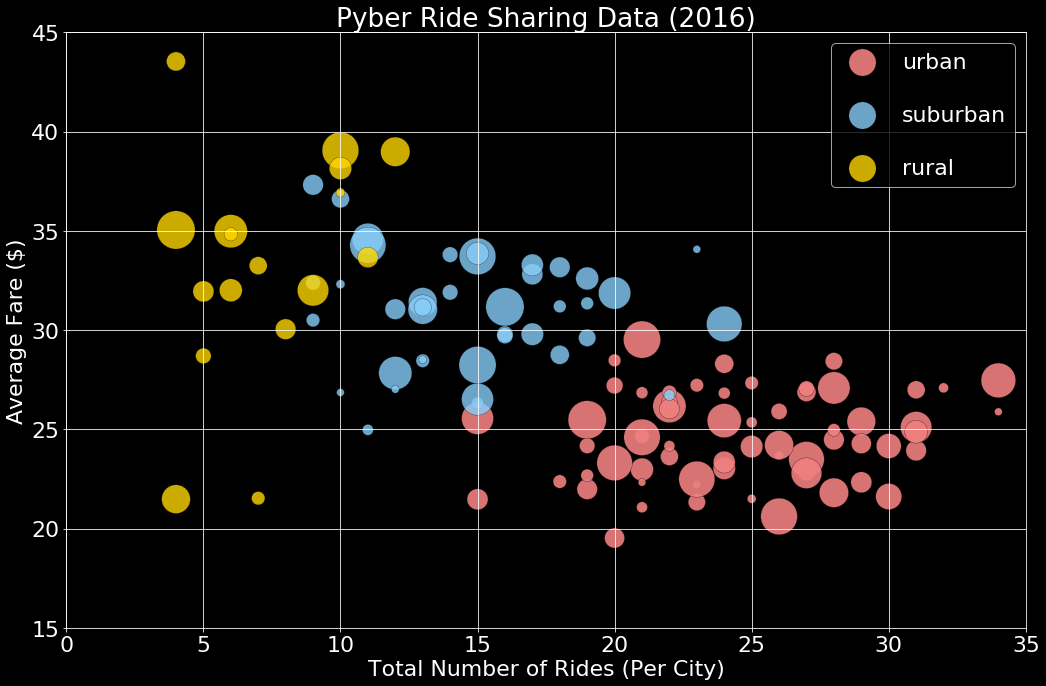

In [6]:
# Scatter plot
plt.style.use("dark_background")
matplotlib.rcParams.update({'font.size': 22})
ax = urban.plot(kind="scatter", x="total_rides", y="average_fare", figsize=(15,10), alpha=.9, edgecolor="k", linewidth=0.3, s=total_drivers*20, color="lightcoral", label="urban");
suburban.plot(kind="scatter", x="total_rides", y="average_fare", alpha=.8, edgecolor="k", linewidth=0.3, s=total_drivers*20, color="lightskyblue", label="suburban", ax=ax);
rural.plot(kind="scatter", x="total_rides", y="average_fare", alpha=.8, edgecolor="k", linewidth=0.3, s=total_drivers*20, color="gold", label="rural", ax=ax);

# Set style
plt.grid()
plt.legend(labelspacing=1.5)

# Set x limt and y limit
plt.xlim(0, 35)
plt.ylim(15, 45)

# Set title, x label, and y label style
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.tight_layout()
plt.show()

# Total Fares by City Type

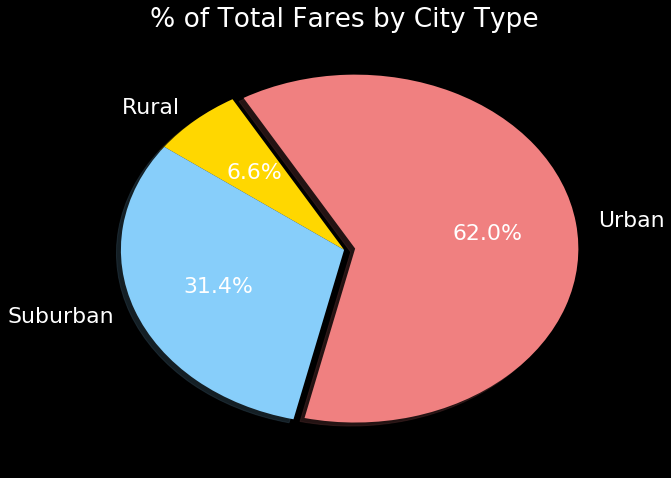

In [7]:
# Create a pie chart based upon total fares by city type
fare_pie = df.groupby("type").sum()
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
fare_pie.plot(kind="pie", y="fare", figsize=(10,8), legend=False, title="% of Total Fares by City Type", explode=explode, autopct="%1.1f%%", shadow=True, startangle=120, colors=colors)
pylab.ylabel('')
plt.show()

# Total Rides by City Type

Text(0,0.5,'')

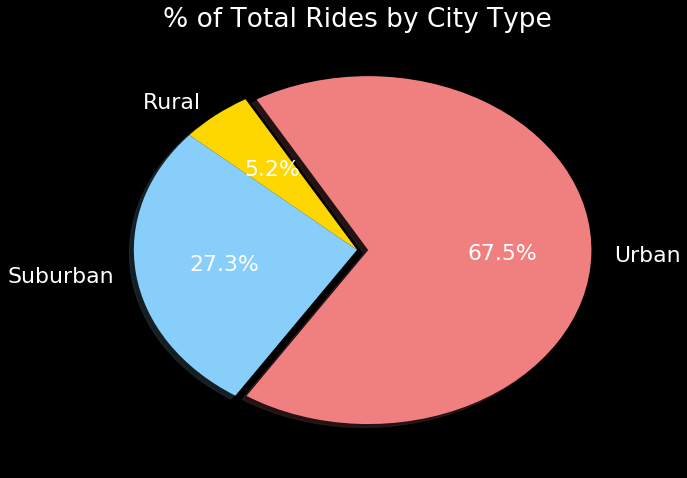

In [8]:
# Create a pie chart based upon total rides by city type
rides_pie = df.groupby("type").count()
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
rides_pie.plot(kind="pie", y="ride_id", figsize=(10,8), legend=False, title="% of Total Rides by City Type",\
               explode=explode, autopct="%1.1f%%", shadow=True,\
               startangle=120, colors=colors)
pylab.ylabel('')

# Total Drivers by City Type

Text(0,0.5,'')

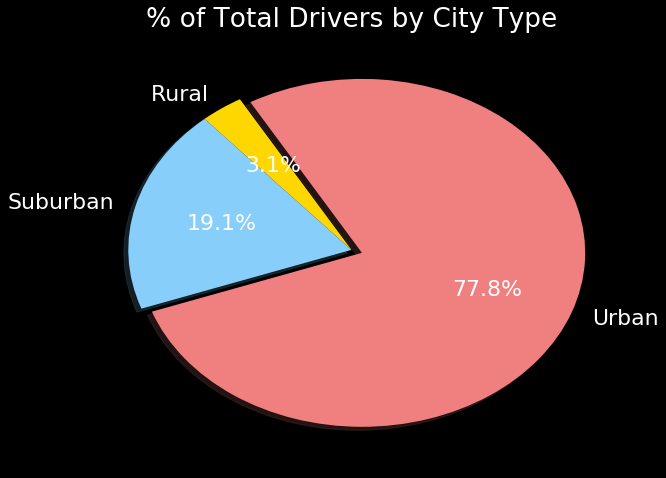

In [9]:
# Create a pie chart based upon total drivers by city type
drivers_pie = city_df.groupby("type").sum()
drivers_pie
explode = (0, 0, 0.05)
colors = ["gold", "lightskyblue", "lightcoral"]
drivers_pie.plot(kind="pie", y="driver_count", figsize=(10,8), legend=False, title="% of Total Drivers by City Type",\
                 explode=explode, autopct="%1.1f%%", shadow=True,\
                 startangle=120, colors=colors)
pylab.ylabel('')